In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('network_backup_dataset.csv')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold, train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [191]:
def residual_plot(prediction, truth):
    residual = truth - prediction
    plt.clf()
    plt.scatter(prediction,residual,edgecolors=(0, 0, 0))
    #plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted Values')
    plt.grid(True)
    plt.show()
    
def scatter_plot(prediction, truth):
    plt.clf()
    plt.scatter(truth, prediction, edgecolors=(0, 0, 0))
    plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
    plt.xlabel('Truth Value')
    plt.ylabel('Fitted Value')
    plt.title('Fitted Values vs. True Values')
    plt.grid(True)
    plt.show()
    
def convert_to_number(backup):
    #convert day of week to integer number
    backup.loc[backup['Day of Week']=='Monday','Day of Week'] = 1
    backup.loc[backup['Day of Week']=='Tuesday','Day of Week'] = 2
    backup.loc[backup['Day of Week']=='Wednesday','Day of Week'] = 3
    backup.loc[backup['Day of Week']=='Thursday','Day of Week'] = 4
    backup.loc[backup['Day of Week']=='Friday','Day of Week'] = 5
    backup.loc[backup['Day of Week']=='Saturday','Day of Week'] = 6
    backup.loc[backup['Day of Week']=='Sunday','Day of Week'] = 7

    #convert work-flow-id to integer number
    backup['Work-Flow-ID'] = backup['Work-Flow-ID'].str.extract('(\d+)',expand=False).astype(int)
    #convert File Name to integer number
    backup['File Name'] = backup['File Name'].str.extract('(\d+)',expand=False).astype(int)

##### i. Using Linear Regression Model

----------------------------------------------
For workflow 0:

Training RMSE: 0.029346600373736122
Testing RMSE: 0.029662407834143877


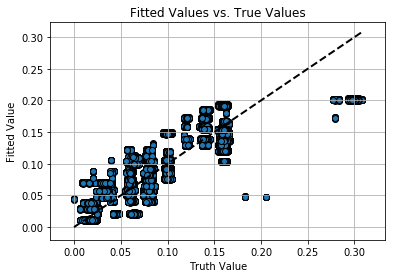

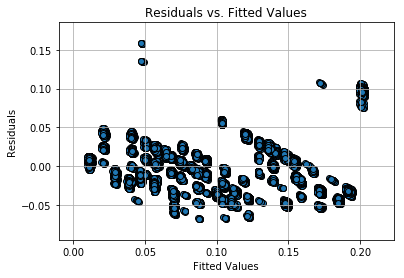

----------------------------------------------
For workflow 1:

Training RMSE: 0.10404286994173478
Testing RMSE: 0.10250988716423405


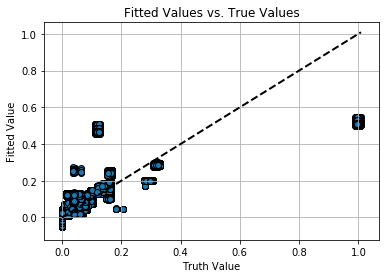

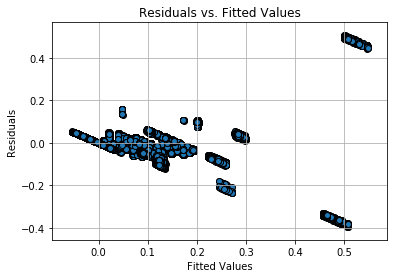

----------------------------------------------
For workflow 2:

Training RMSE: 0.02543508637862067
Testing RMSE: 0.02575950109209536


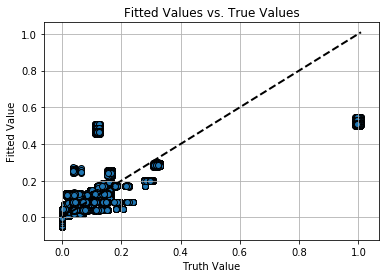

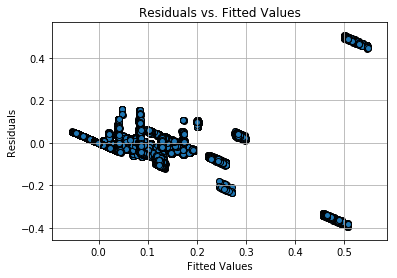

----------------------------------------------
For workflow 3:

Training RMSE: 0.005930077545173057
Testing RMSE: 0.005777804015893053


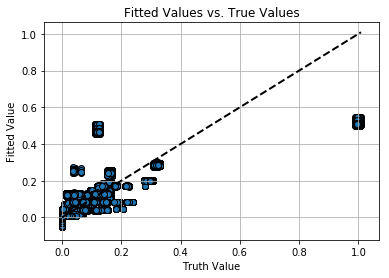

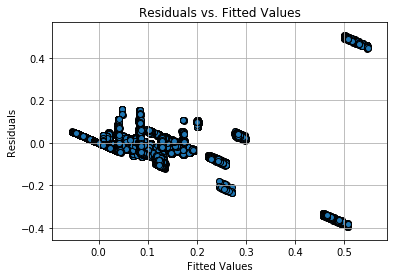

----------------------------------------------
For workflow 4:

Training RMSE: 0.08468780873070743
Testing RMSE: 0.0820561937461601


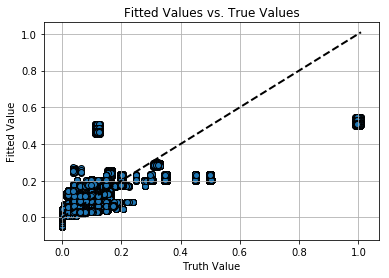

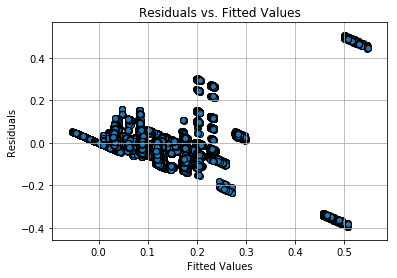

In [192]:
dataset = pd.read_csv('network_backup_dataset.csv')
convert_to_number(dataset)

rmse = [0]*5
y_fitted = pd.DataFrame()
y_actual = pd.DataFrame()

for i in range(5):
    backup_workflow = dataset[dataset['Work-Flow-ID'] == i ]
    backup_workflow = backup_workflow.reset_index(drop = True)
    target_workflow = backup_workflow['Size of Backup (GB)']
    del backup_workflow['Size of Backup (GB)']
    del backup_workflow['Work-Flow-ID']

    lr = linear_model.LinearRegression()
    train_rmse  = 0
    test_rmse = 0
    #predicted = list()
    #truth = list()
    kf = KFold(n_splits=10, random_state=None, shuffle=True)
    for train_index, test_index in kf.split(dataset):
        x_train, x_test, y_train, y_test = train_test_split(backup_workflow,target_workflow,train_size = 0.8, test_size = 0.2)
        lr.fit(x_train,y_train) 
        linreg = lr.predict(x_test) #test_predict
        train_predict = lr.predict(x_train)
        linreg_backup = pd.DataFrame(lr.predict(backup_workflow))
        train_rmse += (mean_squared_error(y_train, train_predict))
        test_rmse += (mean_squared_error(y_test, linreg))
    #store 5 sets of predicted values and actual values into one dataframe
        y_fitted = pd.concat([y_fitted,linreg_backup])
        y_actual = pd.concat([y_actual,target_workflow])
        
    print('----------------------------------------------')
    print ('For workflow %d:' %i)
    print()
    print('Training RMSE:', sqrt(train_rmse / 10))
    print('Testing RMSE:', sqrt(test_rmse / 10))

    y_fitted = y_fitted.reset_index(drop = True)
    y_actual = y_actual.reset_index(drop = True)

#plot actual and fitted values vs. time
    plt.figure(1)
    scatter_plot(y_fitted,y_actual)
    
#plot residual vs. fitted.
    plt.figure(2)
    residual_plot(y_fitted,y_actual)
    plt.show()

##### ii. Using Polynomial Regression Model

In [193]:
dataset = pd.read_csv('network_backup_dataset.csv')

weekdays = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data = np.zeros(dataset.shape)
for i in range(dataset.shape[0]):
    for j in range(dataset .shape[1]):
        if j == 1: # Day of week
            data[i][j] = float(weekdays[dataset.loc[i]['Day of Week']])
        elif j == 3: # workflow id
            data[i][j] = float(dataset.loc[i]['Work-Flow-ID'].split('_')[-1])
        elif j == 4: # file name id
            data[i][j] = float(dataset.loc[i]['File Name'].split('_')[-1])
        else:
            data[i][j] = float(dataset.loc[i][j])

Work Flow 0
For degree  = 1:
10-fold Training RMSE =  0.03583396756184431
10-fold Average Test RMSE =  0.03591487796318963
For degree  = 2:
10-fold Training RMSE =  0.029513876467574876
10-fold Average Test RMSE =  0.029634671207526154
For degree  = 3:
10-fold Training RMSE =  0.026294187852654048
10-fold Average Test RMSE =  0.026663629844104034
For degree  = 4:
10-fold Training RMSE =  0.024936455358537273
10-fold Average Test RMSE =  0.02559466469313078
For degree  = 5:
10-fold Training RMSE =  0.01818659563447829
10-fold Average Test RMSE =  0.018951955375426065
For degree  = 6:
10-fold Training RMSE =  0.010369273452875844
10-fold Average Test RMSE =  0.011082282135995606
For degree  = 7:
10-fold Training RMSE =  0.009055514894648422
10-fold Average Test RMSE =  0.010027315045924108
For degree  = 8:
10-fold Training RMSE =  0.007928882387924344
10-fold Average Test RMSE =  0.009330043369597564
For degree  = 9:
10-fold Training RMSE =  0.007571013178755349
10-fold Average Test RMSE

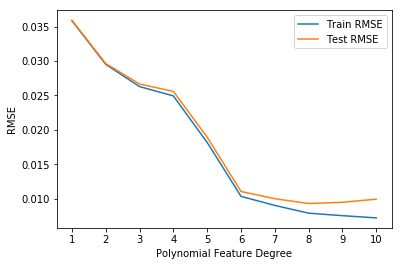

Work Flow 1
For degree  = 1:
10-fold Training RMSE =  0.14876167115246677
10-fold Average Test RMSE =  0.1489971834236514
For degree  = 2:
10-fold Training RMSE =  0.12981827812140448
10-fold Average Test RMSE =  0.13056434835294228
For degree  = 3:
10-fold Training RMSE =  0.11107809741802374
10-fold Average Test RMSE =  0.1125013894996592
For degree  = 4:
10-fold Training RMSE =  0.08927599461377413
10-fold Average Test RMSE =  0.09180420801520704
For degree  = 5:
10-fold Training RMSE =  0.06542549675342717
10-fold Average Test RMSE =  0.0685351272718888
For degree  = 6:
10-fold Training RMSE =  0.0423627009071439
10-fold Average Test RMSE =  0.045150285435685035
For degree  = 7:
10-fold Training RMSE =  0.020680407260683986
10-fold Average Test RMSE =  0.02257642783194067
For degree  = 8:
10-fold Training RMSE =  0.00805513179074175
10-fold Average Test RMSE =  0.009139300388117144
For degree  = 9:
10-fold Training RMSE =  0.005430287250928698
10-fold Average Test RMSE =  0.0065326

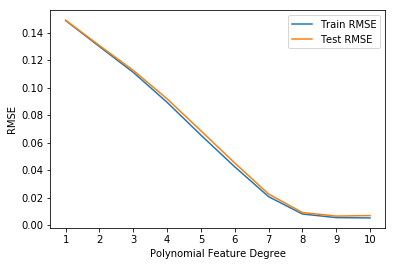

Work Flow 2
For degree  = 1:
10-fold Training RMSE =  0.04291295724524663
10-fold Average Test RMSE =  0.04298659461001206
For degree  = 2:
10-fold Training RMSE =  0.03846897279452206
10-fold Average Test RMSE =  0.03862678579650715
For degree  = 3:
10-fold Training RMSE =  0.03446781185390031
10-fold Average Test RMSE =  0.03476811259099144
For degree  = 4:
10-fold Training RMSE =  0.031819242855141955
10-fold Average Test RMSE =  0.03241802604889343
For degree  = 5:
10-fold Training RMSE =  0.02588983156793822
10-fold Average Test RMSE =  0.026805069997265216
For degree  = 6:
10-fold Training RMSE =  0.021611555541861446
10-fold Average Test RMSE =  0.02281880032750343
For degree  = 7:
10-fold Training RMSE =  0.02070647855423281
10-fold Average Test RMSE =  0.022580231702550885
For degree  = 8:
10-fold Training RMSE =  0.019263211027940156
10-fold Average Test RMSE =  0.02186016199441968
For degree  = 9:
10-fold Training RMSE =  0.017770323362237852
10-fold Average Test RMSE =  0.0

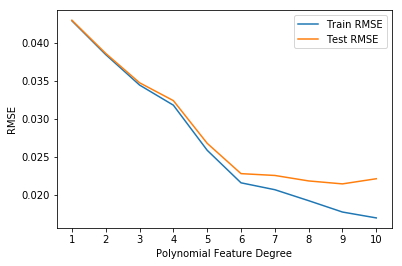

Work Flow 3
For degree  = 1:
10-fold Training RMSE =  0.007244299738512194
10-fold Average Test RMSE =  0.007251962864405937
For degree  = 2:
10-fold Training RMSE =  0.006380924615793869
10-fold Average Test RMSE =  0.006398802665704751
For degree  = 3:
10-fold Training RMSE =  0.006023793549380267
10-fold Average Test RMSE =  0.006064785958402056
For degree  = 4:
10-fold Training RMSE =  0.0054529334858801045
10-fold Average Test RMSE =  0.00553183977679931
For degree  = 5:
10-fold Training RMSE =  0.004898637632095159
10-fold Average Test RMSE =  0.0050376146523778064
For degree  = 6:
10-fold Training RMSE =  0.00458472843799947
10-fold Average Test RMSE =  0.004802638735424925
For degree  = 7:
10-fold Training RMSE =  0.004366730190272247
10-fold Average Test RMSE =  0.004684656905030734
For degree  = 8:
10-fold Training RMSE =  0.004238051874173559
10-fold Average Test RMSE =  0.00471624890678298
For degree  = 9:
10-fold Training RMSE =  0.004140264999031666
10-fold Average Test R

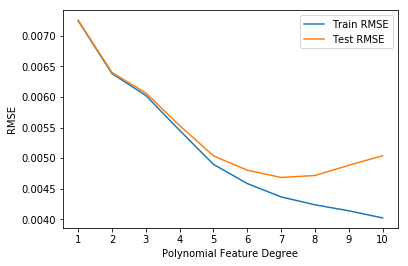

Work Flow 4
For degree  = 1:
10-fold Training RMSE =  0.08591923764574913
10-fold Average Test RMSE =  0.08604121736533818
For degree  = 2:
10-fold Training RMSE =  0.06918008394497954
10-fold Average Test RMSE =  0.06957133366957198
For degree  = 3:
10-fold Training RMSE =  0.06084359651661992
10-fold Average Test RMSE =  0.061402407052124505
For degree  = 4:
10-fold Training RMSE =  0.04891434135778979
10-fold Average Test RMSE =  0.049889604972775545
For degree  = 5:
10-fold Training RMSE =  0.03607317026344064
10-fold Average Test RMSE =  0.03746519499791293
For degree  = 6:
10-fold Training RMSE =  0.02579220595370428
10-fold Average Test RMSE =  0.0275340127362931
For degree  = 7:
10-fold Training RMSE =  0.02083232053204319
10-fold Average Test RMSE =  0.02333293274353177
For degree  = 8:
10-fold Training RMSE =  0.01836621786608786
10-fold Average Test RMSE =  0.021515497576893267
For degree  = 9:
10-fold Training RMSE =  0.015973233025614368
10-fold Average Test RMSE =  0.0206

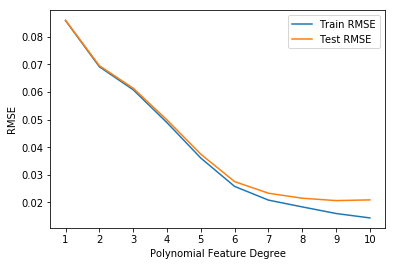

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X = data[:,0:5]
y = data[:,5]
n_splits = 10

for wid in range(5):
    print("Work Flow %i" % wid)
    wid_data = data[(data[:,3] == wid)]
    X_wid = np.delete(wid_data[:,0:5], 3, axis=1)
    y_wid = wid_data[:,5] #size
    scaler = StandardScaler()
    X_wid = scaler.fit_transform(X_wid, y_wid)
    
    degrees = range(1,11)
    
    avgTrainRMSEs, avgTestRMSEs = [0]*10, [0]*10
      
    for p in degrees:   
        
        X_p = PolynomialFeatures(p).fit_transform(X_wid)
        y_p = y_wid
    
        scaler = StandardScaler()
        X_p = scaler.fit_transform(X_p, y_p)
             
        TrainRMSE, TestRMSE = 0, 0 
        kf = KFold(n_splits = 10,random_state=None, shuffle=True)
        
        for train_index, test_index in kf.split(X_p): # Output 10 train test RMSE values
            X_train, X_test = X_p[train_index], X_p[test_index]
            y_train, y_test = y_p[train_index], y_p[test_index]
            lr = linear_model.LinearRegression()
            lr.fit(X_train, y_train)
            pred_train, pred_test = lr.predict(X_train), lr.predict(X_test)  
    
            TrainRMSE += mean_squared_error(y_train, pred_train)
            TestRMSE += mean_squared_error(y_test, pred_test)
           
        avgTrainRMSEs[p-1]= (TrainRMSE /10.0)**0.5
        avgTestRMSEs[p-1]= (TestRMSE /10.0)**0.5
        
        print ('For degree  = %d:' %p)
        print('10-fold Training RMSE = ', avgTrainRMSEs[p-1])
        print ('10-fold Average Test RMSE = ', avgTestRMSEs[p-1])

    fig, ax = plt.subplots()
    ax.plot(degrees, avgTrainRMSEs, label="Train RMSE")
    ax.plot(degrees, avgTestRMSEs, label="Test RMSE")    
    ax.set_xticks(degrees)
    ax.set_xlabel('Polynomial Feature Degree')
    ax.set_ylabel('RMSE')
    plt.legend()
    plt.show()